In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Overview

In this part of the lab, we will look at how to use simulation to investigate the distributions and expectations of random variables. 

### A Random Walk

Probabilities and Conditional Probabilities
1. What is $P(k | p = 0.5)$?
2. What is the probability of rolling 10 heads in a row? 
3. Given two coins $(p_A = 0.5,p_B = 0.51)$, what is the $P(coint=A|k)$?

Expectation, Mean, and Variance
1. Numerically find the mean and variance
2. Find the theoretical mean and variance

### If Time Permits
Monty Hall Problem or Letter Sorting Problem

### Probabilities and Conditional Probabilities

Some of your friends in the statistics department are playing a game. Here are the rules:
1. Each player starts with a chip on the ground. 
2. A coin is flipped. If H, the chip is moved 1 cm to the right. If T, the chip is moved 1 cm to the left.
3. This is repeated 1000 times. 
4. The winner is the player whose chip is furthest to the right. 

Create a function called 'random_walk' which simulates this random walk and outputs the final location of the chip for a given player. Provide an argument p to allow the coin to be biased.

In [2]:
def random_walk(n_steps = 1000,p=0.5):
    
    steps = (np.random.uniform(0,1,size=n_steps) <= p).astype(int)*2-1
    
    x = np.sum(steps)
    
    return x

Plot the empirical distribution for the final location of a given player given p = 0.5. Repeat the experiment at least 100000 times. What is the probability of getting more than 50 cm away from the starting point? 

1.0

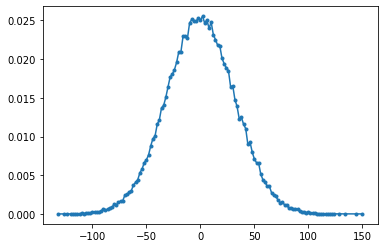

In [6]:
n_trials = 100000

samples = np.array([random_walk(p=0.5) for _ in range(n_trials)])
X = np.unique(samples)
p_X = np.array([np.sum(samples == x)/len(samples) for x in X])

plt.plot(X,p_X,'.-')
np.sum(p_X)

# x,counts = np.unique(samples,return_counts=True)
# p = counts/len(samples)
# plt.plot(x,p,'.-')

In [7]:
np.sum(p_X[X > 50])

0.05378000000000001

Calculate the theoretical value for this event.

Lets set up the sample space:

\begin{equation}
\Omega = \{w_1w_2...w_N | w_i \in \{H,T\}, i=1...N\}
\end{equation}

For example, a particular outcome might be $HTHHHT...H$. Let the probability of an individual roll coming up heads be denoted by p. We assume that outcomes of individual rolls are independent. So the probability of a particular sequence even by

\begin{equation}
P(w_1w_2...w_N) = p^{n_H}(1-p)^{n_T} = p^{n_H}(1-p)^{N-n_H}
\end{equation}

where $n_H$ is the number of heads. 



In our game, the destination, $x$, is a random variable that maps from $\Omega$ to the real numbers. Let's determine that mapping. For a given destination, $x$, how many steps to the left and right are needed to arrive at $x$, given N total steps? 

\begin{equation}
\begin{split}
x &= n_H - n_T\\
N &= n_H + n_T\\
x + N &= 2n_H\\
x &= 2n_H - N\\
\end{split}
\end{equation}

What is the probability that $n_H$ is equal to a given number (e.g. k = (x + N)/2)). We know that the probability of a specific roll having $k$ heads is given by $p^{n_H}(1-p)^{N-n_H}$. But this undercounts because there are N choose k different ways of picking the $i$'s for which $w_i = H$. Therefore the probability is given by

\begin{equation}
P(k|p,N) = {N \choose k}p^k(1-p)^{N-k}
\end{equation}

In our case, we need to find the probability that $k > (N + x)/2 = 525$

In [9]:
from scipy.special import comb

p_gt50 = 0
N = 1000
p_H = 0.5

for k in range(526,N+1):
    p_gt50 += comb(N,k)*(p_H**k)*(1-p_H)**(N-k)

print(p_gt50)

0.05337477101718193


Let's go ahead and compare the empirical and theoretical distributions:

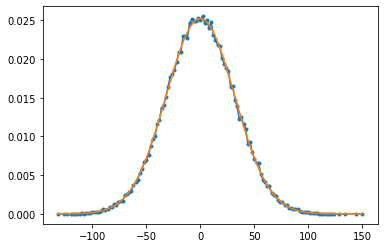

In [11]:
q_X = []

for x in X:
    k = (N+x)/2
    q_X.append(comb(N,k)*(p_H**k)*(1-p_H)**(N-k))

plt.plot(X,p_X,'.-')
plt.plot(X,q_X)

**Rolling 10 Heads in a Row**

Sam and Katie are two of your statistician friends. In the last game, Katie rolled heads 10 times in a row, prompting sam to suspect fowl play. What is probability of rolling 10 Heads in a row? 

In [12]:
N = 100000

count = 0
reps = 10

for _ in range(N):
    steps = (np.random.uniform(0,1,size=1000) < 0.5).astype(int)       
    m = np.max(np.convolve(steps, np.ones(reps), mode='valid'))
    if m == reps:
        count += 1
    
p = count/N
print(p)

0.38543


How would you calculate this probability theoretically? Answer: Not easily. 

**Conditional Probability: Which Coin**

Eustice is another friend in the statistics deparment. He has bragged to Sam that he has a weighted coin that gives heads 51% of the time. But he only uses it one in every 10 games so that the referees don't catch on (He rolls a 10 sided die to determine whether he should use it). Eustice has just won two games by ending with his piece 40 cm and 75 cm to the right. Calculate the probability that he used his weighted coin, given that the final location was greater than 40cm and 75cm. 

In [14]:
N = 100000

p_coin = np.array([(0.5 if p < 0.9 else 0.51) for p in np.random.uniform(size=N)])
samples = np.array([random_walk(p=p) for p in p_coin])

In [20]:
# P(A|B) = P(A and B)/P(B) = N(A and B)/N(B)

X_final = 40

N_gtX = np.sum(samples > X_final)
print(f'Number of trials > {X_final}cm: {N_gtX}')

N_gtX_and_cheating = np.sum(np.logical_and(samples > X_final,p_coin == 0.51))
print(f'Number of cheating trials > {X_final} cm: {N_gtX_and_cheating}\n')

print(f'Probability of cheating given > {X_final} cm: {N_gtX_and_cheating/N_gtX}')

N_gtX_and_fair = np.sum(np.logical_and(samples > X_final,p_coin == 0.50))

print(f'Probability of playing fair given > {X_final} cm: {N_gtX_and_fair/N_gtX}')

Number of trials > 40cm: 11333
Number of cheating trials > 40 cm: 2448

Probability of cheating given > 40 cm: 0.21600635312803318
Probability of playing fair given > 40 cm: 0.7839936468719668


In [21]:
# P(A|B) = P(A and B)/P(B) = N(A and B)/N(B)

X_final = 75

N_gtX = np.sum(samples > X_final)
print(f'Number of trials > {X_final}cm: {N_gtX}')

N_gtX_and_cheating = np.sum(np.logical_and(samples > X_final,p_coin == 0.51))
print(f'Number of cheating trials > {X_final} cm: {N_gtX_and_cheating}\n')

print(f'Probability of cheating given > {X_final} cm: {N_gtX_and_cheating/N_gtX}')

N_gtX_and_fair = np.sum(np.logical_and(samples > X_final,p_coin == 0.50))

print(f'Probability of playing fair given > {X_final} cm: {N_gtX_and_fair/N_gtX}')

Number of trials > 75cm: 1146
Number of cheating trials > 75 cm: 392

Probability of cheating given > 75 cm: 0.34205933682373474
Probability of playing fair given > 75 cm: 0.6579406631762653


How do we calculate this theoretically? You should think about this. 

### Expectations, Mean, and Variance

Everything that we've done above is supported by the law of large numbers, which states that as $N \rightarrow \infty$, the empirical average of the samples of a random variable converges to the expecation of the random variable, that is

\begin{equation}
\frac{1}{N}\sum_1^N X_i \rightarrow E[X]
\end{equation}

In the case of the probabilities, $P[X = x]$, we have been examining, consider that 

\begin{equation}
\frac{\text{# of samples with X = x}}{\text{total number of samples}}=\frac{1}{N}\sum_1^N 1_{\{X_i = x\}} \rightarrow E[1_{\{X_i = x\}}] = P[X = x]
\end{equation}

In this section, we will estimate some other expecations, namely, the mean $\mu = E[X]$ and the variance $\text{var}(X) = E[X^2] - \mu^2$

**Empirical mean and variance**

Calculate the empirical mean and variance for N=1000, p={0.5,0.7}

In [25]:
n_trials = 100000
samples = np.array([random_walk(p=0.5) for _ in range(n_trials)])

mu = np.mean(samples)

var = np.mean(samples**2) - mu**2
std = np.sqrt(var)

print(f'Mean: {mu}, Variance: {var}, Standard Dev: {std}')

Mean: -0.01582, Variance: 1002.9441097276, Standard Dev: 31.669292851713628


In [26]:
n_trials = 100000
samples = np.array([random_walk(p=0.7) for _ in range(n_trials)])

mu = np.mean(samples)

var = np.mean(samples**2) - mu**2
std = np.sqrt(var)

print(f'Mean: {mu}, Variance: {var}, Standard Dev: {std}')

Mean: 399.81824, Variance: 830.8443233023863, Standard Dev: 28.8243703019231


**Theoretical Mean and Variance**

In [32]:
N = 1000
p_H = 0.5
mu_nH = N*p_H
var_nH = N*p_H*(1-p_H)

mu = 2*mu_nH - N
var = 4*var_nH

print(f'Mean: {mu}, Variance: {var}')

Mean: 0.0, Variance: 1000.0


In [33]:
N = 1000
p_H = 0.7
mu_nH = N*p_H
var_nH = N*p_H*(1-p_H)

mu = 2*mu_nH - N
var = 4*var_nH

print(f'Mean: {mu}, Variance: {var}')

Mean: 400.0, Variance: 840.0000000000001
